In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
rng = np.random.default_rng(42)

In [4]:
paths = 50
points = 1000

In [5]:
mu, sigma = 0.0, 1.0

In [7]:
rng.normal(mu, sigma, (2,3))

array([[-1.03998411,  0.7504512 ,  0.94056472],
       [-1.95103519, -1.30217951,  0.1278404 ]])

<AxesSubplot:ylabel='Count'>

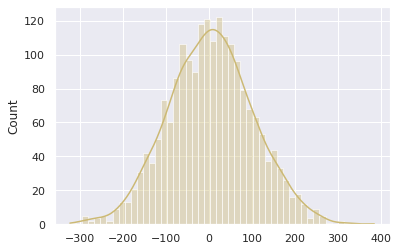

In [54]:
# check for Normal distribution
np.random.seed(42)

# genergate random number with large dimension
rnd_num = 100*np.random.normal(0,1, 2000)

# sns.set()
# plt.hist(rnd_num/np.max(rnd_num), 50)
sns.histplot(rnd_num, bins=50, kde=True, alpha=0.4, color='y')

In [30]:
Z = rng.normal(mu, sigma, (paths, points))

In [31]:
# calculate dt
interval = [0.0, 1.0]
dt = (interval[1] - interval[0]) / (points - 1)

In [32]:
t_axis = np.linspace(interval[0], interval[1], points)

In [33]:
W = np.zeros((paths, points))
for idx in range(points - 1):
    real_idx = idx + 1
    W[:, real_idx] = W[:, real_idx - 1] + np.sqrt(dt) * Z[:, idx]

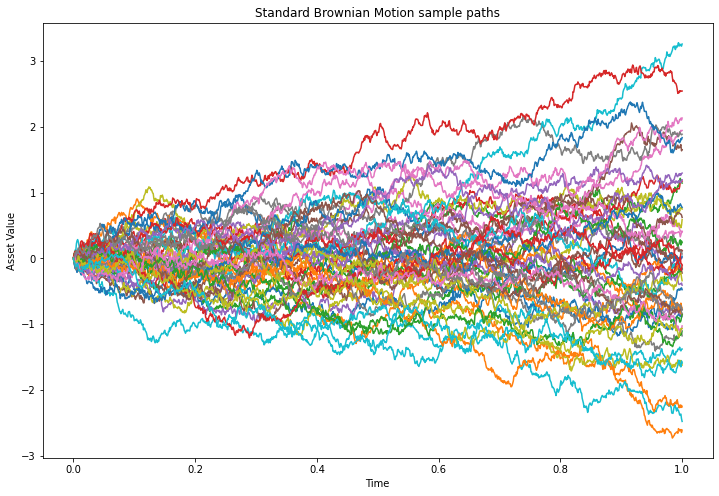

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for path in range(paths):
    ax.plot(t_axis, W[path, :])
ax.set_title("Standard Brownian Motion sample paths")
ax.set_xlabel("Time")
ax.set_ylabel("Asset Value")
plt.show()

It is fairly clear that the bulk of the paths are clustering around zero near 
 (the end of the simulation), within the -1 and 1 values, while there are a few examples of more extreme ending values. This is the expected behaviour for a standard Brownian Motion.

However, this can be made more quantitative by estimating the distribution of final path values for each of the 
 sample paths produced. To achieve this we can use a Kernel Density Estimate (KDE), which is a method for estimating a (continuous) probability distribution from finite sample data. The Seaborn statistical visualisation library will be used for this.

The first step is to create a Pandas DataFrame (with a single column) of the sample path ending values:

In [35]:
final_values = pd.DataFrame({'final_values': W[:, -1]})

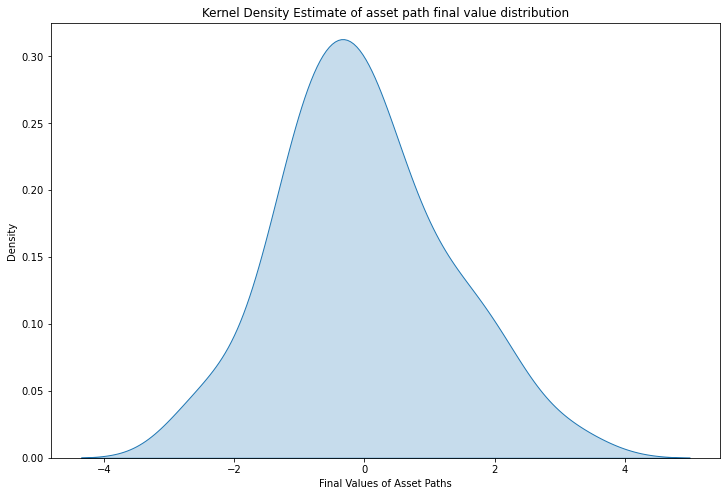

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.kdeplot(data=final_values, x='final_values', fill=True, ax=ax)
ax.set_title("Kernel Density Estimate of asset path final value distribution")
ax.set_ylim(0.0, 0.325)
ax.set_xlabel('Final Values of Asset Paths')
plt.show()

In [55]:
print(final_values.mean(), final_values.std())

final_values   -0.017977
dtype: float64 final_values    1.271148
dtype: float64


### Constant Drift and Volatility Brownian Motion

In [57]:
mu_c, sigma_c = 5.0, 2.0

In [58]:
X = np.zeros((paths, points))
for idx in range(points - 1):
    real_idx = idx + 1
    X[:, real_idx] = X[:, real_idx - 1] + mu_c * dt + sigma_c * np.sqrt(dt) * Z[:, idx]

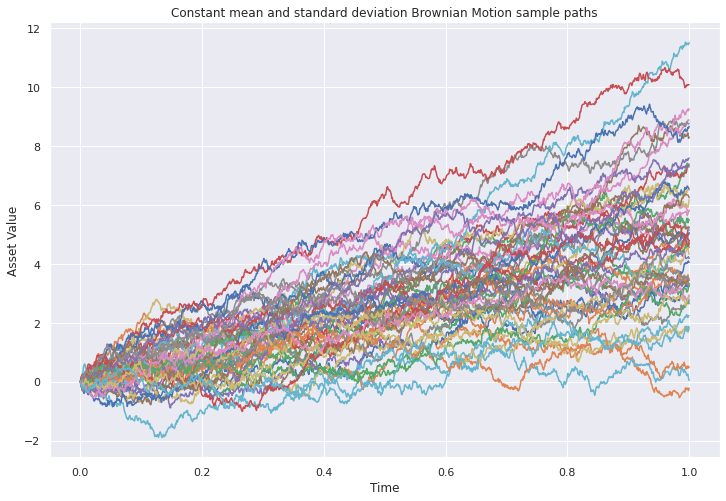

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for path in range(paths):
    ax.plot(t_axis, X[path, :])
ax.set_title("Constant mean and standard deviation Brownian Motion sample paths")
ax.set_xlabel("Time")
ax.set_ylabel("Asset Value")
plt.show()